In [1]:
# Import required package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Assign url of file: url
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

# Read in all sheets of Excel file and load into xl 
# we skipped the first row because the data had two rows with column labels
xl = pd.read_excel(url, sheet_name=None, skiprows = [0])

In [3]:
#convert the xl OrderedDict to a pandas dataframe
df = pd.DataFrame(xl['Data'])

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
#check the dataframe
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#create a new list of column label to rename the columns of dataframe
new_columns = ['id','limit_balance', 'gender', 'education','marital_status', 'age','status_september','status_august','status_july','status_june','status_may','status_april','balance_september','balance_august','balance_july','balance_june','balance_may','balance_april','paid_september','paid_august','paid_july','paid_june','paid_may','paid_april','default_payment']
#change the column labels
df.columns = new_columns

In [7]:
#to check the column labels
df.head()

,id,limit_balance,gender,education,marital_status,age,status_september,status_august,status_july,status_june,...,balance_june,balance_may,balance_april,paid_september,paid_august,paid_july,paid_june,paid_may,paid_april,default_payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
#to get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id                   30000 non-null int64
limit_balance        30000 non-null int64
gender               30000 non-null int64
education            30000 non-null int64
marital_status       30000 non-null int64
age                  30000 non-null int64
status_september     30000 non-null int64
status_august        30000 non-null int64
status_july          30000 non-null int64
status_june          30000 non-null int64
status_may           30000 non-null int64
status_april         30000 non-null int64
balance_september    30000 non-null int64
balance_august       30000 non-null int64
balance_july         30000 non-null int64
balance_june         30000 non-null int64
balance_may          30000 non-null int64
balance_april        30000 non-null int64
paid_september       30000 non-null int64
paid_august          30000 non-null int64
paid_july            30000 non-null int64
paid_june

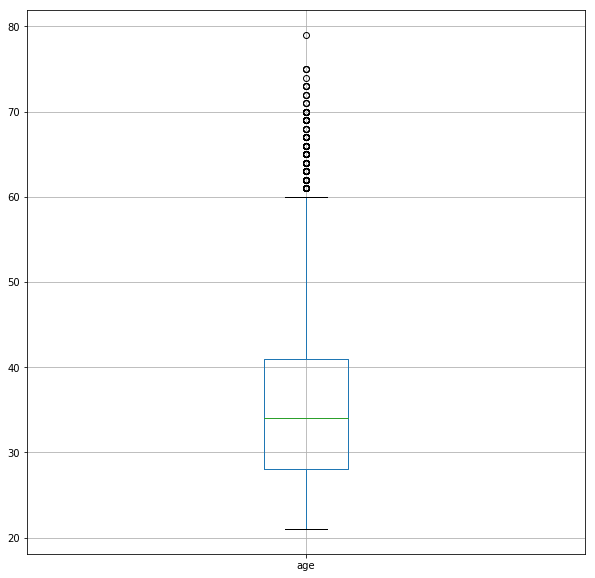

In [12]:
#Using the boxplot to check for outliers
df.boxplot('age',figsize=(10,10))

In [14]:
#Create a list of column labels for different months for balance amount and paid amount
balance = ['balance_september','balance_august','balance_july','balance_june','balance_may','balance_april']
paid = ['paid_september','paid_august','paid_july','paid_june','paid_may','paid_april']

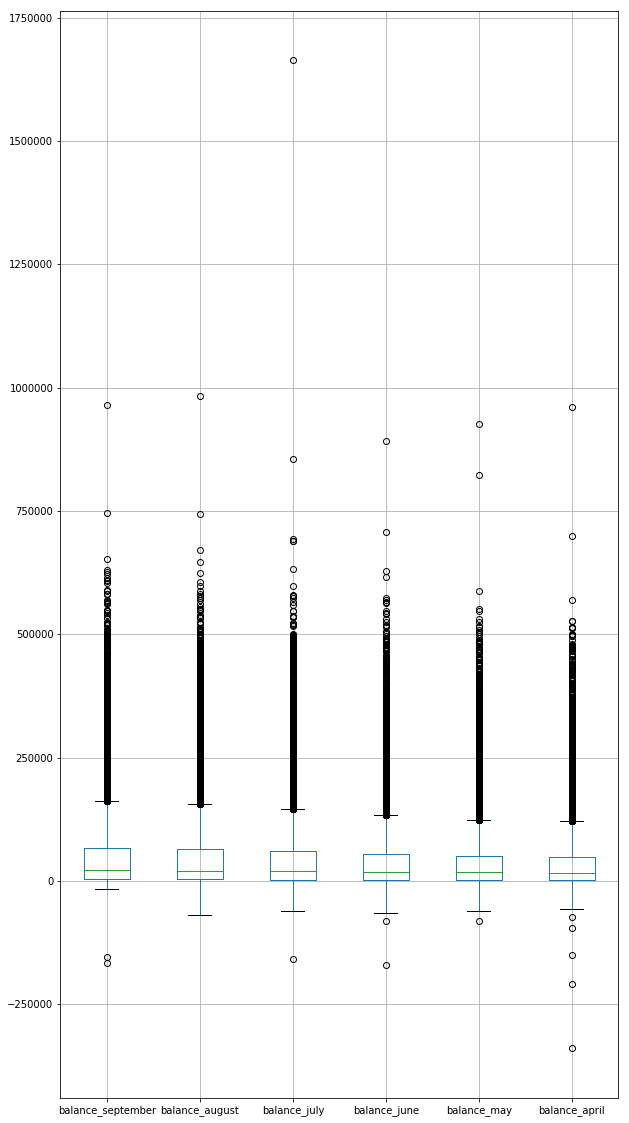

In [15]:
#we can use boxplot to check for outliers from balance columns for each month
df.boxplot(balance, figsize=(10,20))

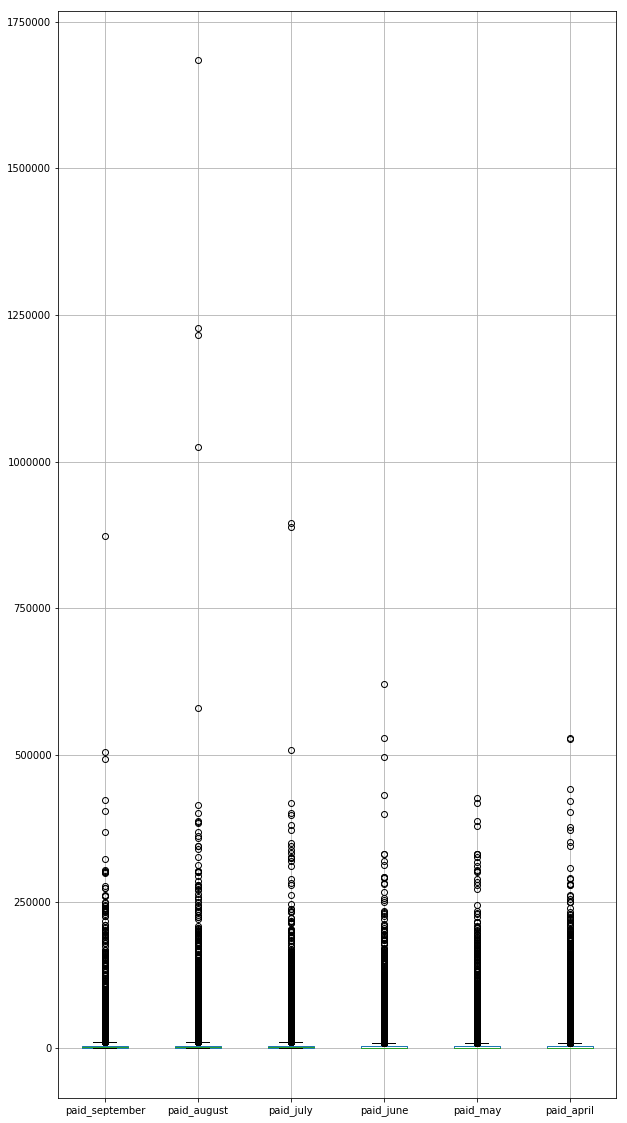

In [16]:
#Draw boxplot to detect outliers from paid column for each month
df.boxplot(paid, figsize=(10,20))

In [17]:
#find min, max, median, 1st and 3rd quartile values for balance column of each month 
df[balance].describe()

,balance_september,balance_august,balance_july,balance_june,balance_may,balance_april
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [18]:
#find min, max, median, 1st and 3rd quartile values for paid column of each month
df[paid].describe()

,paid_september,paid_august,paid_july,paid_june,paid_may,paid_april
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [20]:
#We created a new dataframe to update and modify bad data plus the outliers values
new_df = df.copy()

In [21]:
#to change the bad values 5 and 6 into 4 from education column
for i in new_df[new_df['education']>4]['education'].index:
    new_df.at[i,'education'] = 4

In [22]:
#to change the bad value 0 from marital_status column
for i in new_df[new_df['marital_status']==0]['education'].index:
    new_df.at[i,'marital_status'] = 3

In [23]:
#this for loop will locate the outliers from the dataframe and update those values with their corresponding lower and upper limit
#iterate over the list named balance, which has the balance column labels
for month in balance:
    #calculate 3rd quartile
    q3 = new_df[month].quantile(0.75)
    #calculate 1st quartile
    q1 = new_df[month].quantile(0.25)
    #calculate interquartile range
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    lower_index = new_df[new_df[month]<=lower].index
    upper_index = new_df[new_df[month]>=upper].index
    for i in lower_index:
        new_df.at[i,month] = lower
    for i in upper_index:
        new_df.at[i,month] = upper

In [24]:
#check to if the vlaues has been updated
new_df[balance].describe()

,balance_september,balance_august,balance_july,balance_june,balance_may,balance_april
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,44293.450233,42394.537900,40125.555900,36550.997233,33754.083167,32595.032667
std,51294.801146,49266.871502,46699.460373,42751.309326,39895.878481,39367.609047
min,-91739.000000,-69777.000000,-83581.000000,-75942.000000,-70878.000000,-70657.000000
25%,3558.750000,2984.750000,2666.250000,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,20088.500000,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,60164.750000,54506.000000,50190.500000,49198.250000
max,162389.000000,155538.000000,146412.000000,132774.000000,122831.000000,121111.000000


In [25]:
#this for loop will locate the outliers from the dataframe and update those values with their corresponding lower and upper limit
#iterate over the list named paid, which has the paid column labels
for month in paid:
    #calculate 3rd quartile
    q3 = new_df[month].quantile(0.75)
    #calculate 1st quartile
    q1 = new_df[month].quantile(0.25)
    #calculate interquartile range
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    lower_index = new_df[new_df[month]<=lower].index
    upper_index = new_df[new_df[month]>=upper].index
    for i in lower_index:
        new_df.at[i,month] = lower
    for i in upper_index:
        new_df.at[i,month] = upper

In [26]:
#to check the update
new_df[paid].describe()

,paid_september,paid_august,paid_july,paid_june,paid_may,paid_april
count,30000.000000,30000.000000,30000.00000,30000.0000,30000.000000,30000.000000
mean,3496.730800,3422.261733,3035.77460,2718.2836,2731.547167,2714.400900
std,3492.742781,3532.719654,3355.53413,3073.2736,3094.091228,3131.096792
min,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000
25%,1000.000000,833.000000,390.00000,296.0000,252.500000,117.750000
50%,2100.000000,2009.000000,1800.00000,1500.0000,1500.000000,1500.000000
75%,5006.000000,5000.000000,4505.00000,4013.2500,4031.500000,4000.000000
max,11015.000000,11250.000000,10677.00000,9589.0000,9700.000000,9823.000000


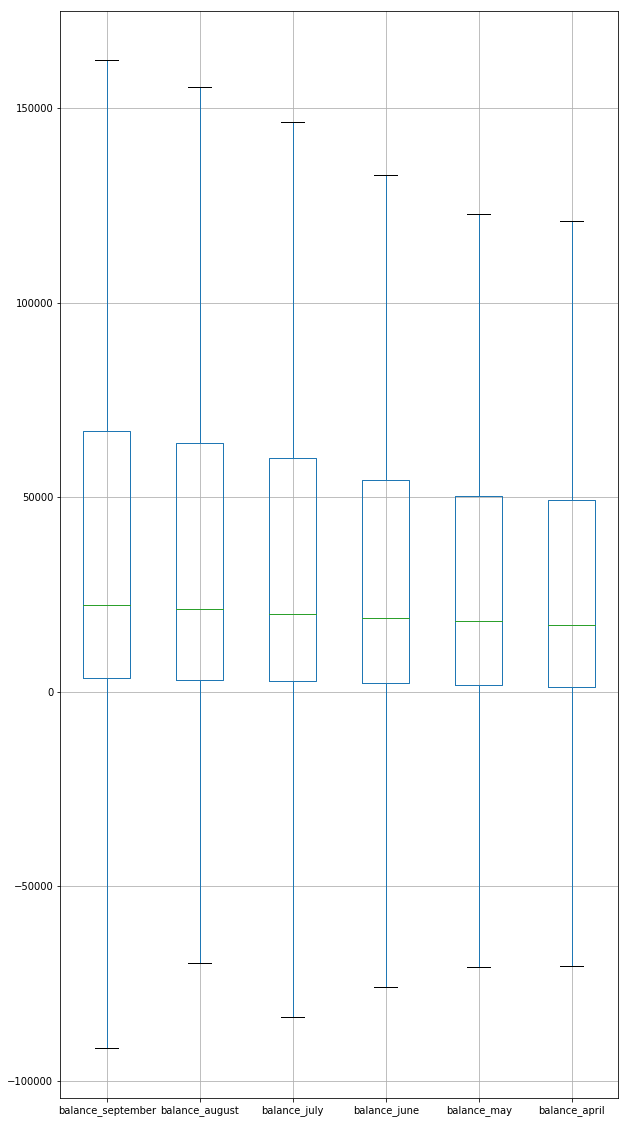

In [27]:
#to check the updated value using boxplot
new_df.boxplot(balance,figsize=(10,20))

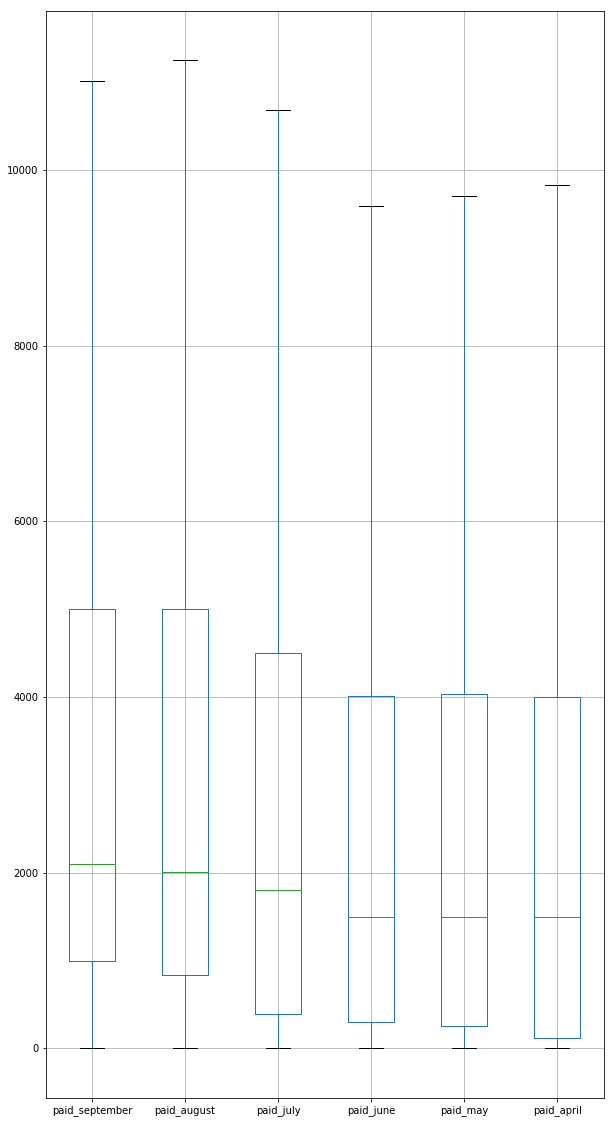

In [28]:
new_df.boxplot(paid, figsize=(10,20))

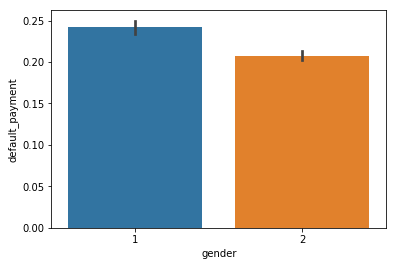

In [40]:
#draw a box plot with gender on x axis and default_payment on y axis
sns.barplot(x='gender',y='default_payment',data = new_df)

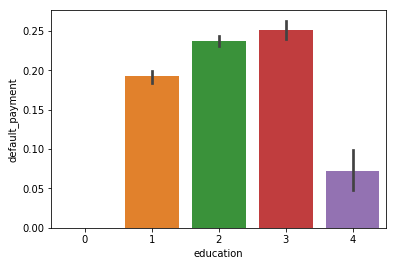

In [41]:
#draw a box plot with education on x axis and default_payment on y axis
sns.barplot(x='education',y='default_payment',data = new_df)

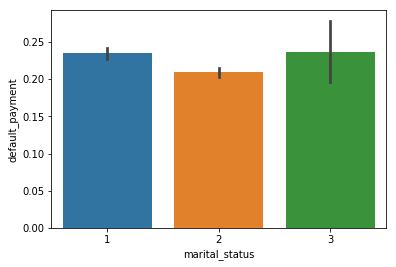

In [42]:
#draw box plot with marital_status on x axis and default payment on y axis
sns.barplot(x='marital_status',y='default_payment',data = new_df)

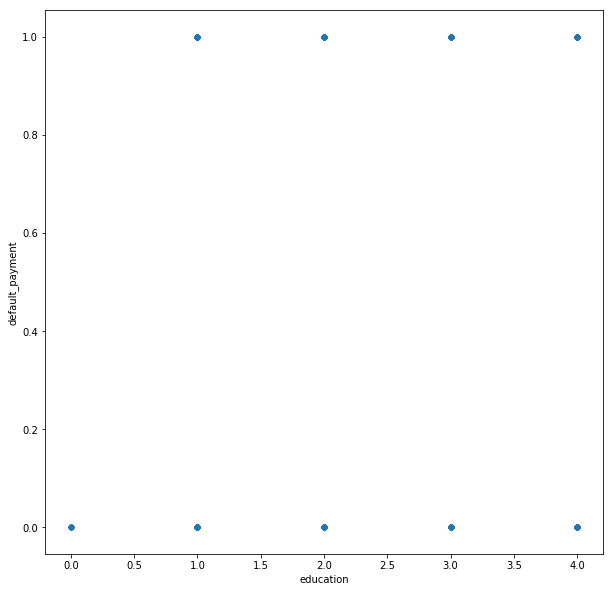

In [44]:
#draw a scatter plot betwen education and default_payment
new_df.plot.scatter(x='education',y='default_payment',figsize=(10,10))

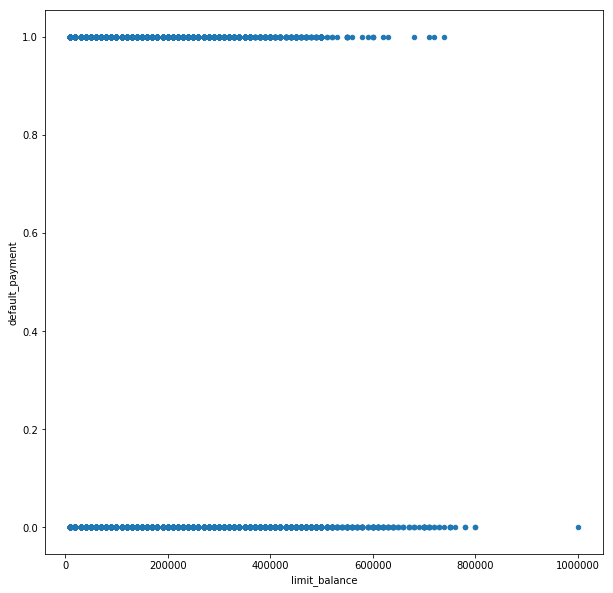

In [45]:
#draw a scatter plot between limit_balance and default_payment
new_df.plot.scatter(x='limit_balance',y='default_payment',figsize=(10,10))

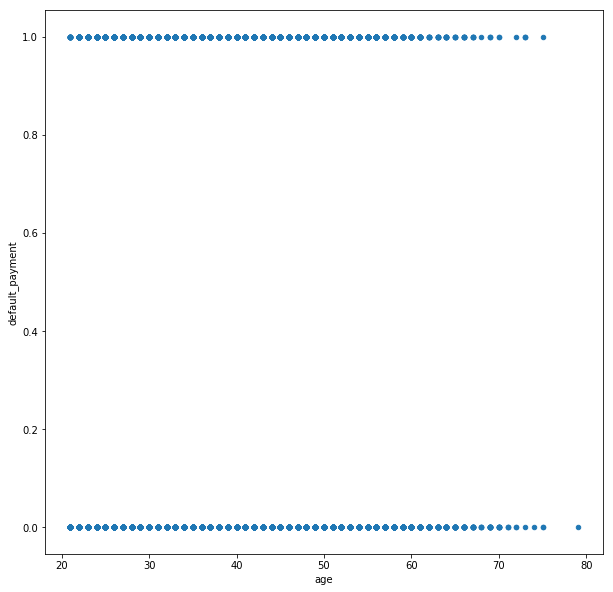

In [46]:
#draw a scatter plot between age and default_payment
new_df.plot.scatter(x='age',y='default_payment',figsize=(10,10))

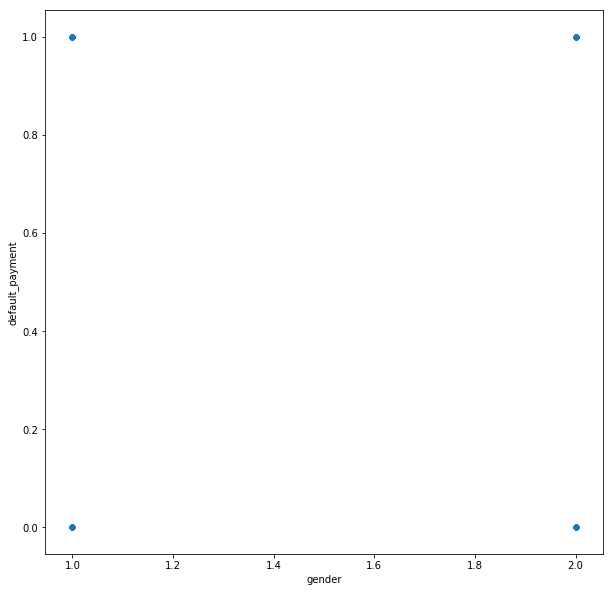

In [56]:
#draw a scatter plot to see the relationship between default_payment and gender
new_df.plot.scatter(x='gender',y='default_payment',figsize=(10,10))